In [1]:
from torchvision import datasets

cifar10 = datasets.CIFAR10("../", train=True, download=True)
cifar10_val = datasets.CIFAR10("../", train=False, download=True)

In [2]:
help(datasets.CIFAR10)

Help on class CIFAR10 in module torchvision.datasets.cifar:

class CIFAR10(torchvision.datasets.vision.VisionDataset)
 |  CIFAR10(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |
 |  `CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
 |
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where directory
 |          ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
 |      train (bool, optional): If True, creates dataset from training set, otherwise
 |          creates from test set.
 |      transform (callable, optional): A function/transform that takes in a PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      download (bool, optional):

In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

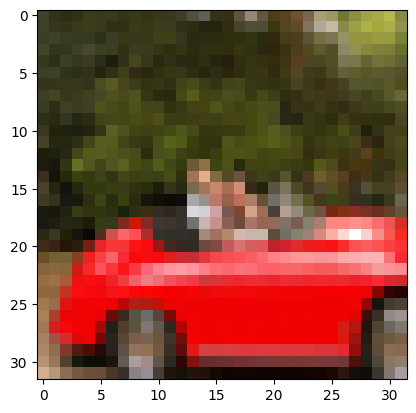

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [8]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [9]:
tensor_cifar10 = datasets.CIFAR10("../", train=True, download=False,
                                  transform=transforms.ToTensor())

In [10]:
img_t, _ = tensor_cifar10[99]
img_t.dtype, img_t.shape

(torch.float32, torch.Size([3, 32, 32]))

In [11]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

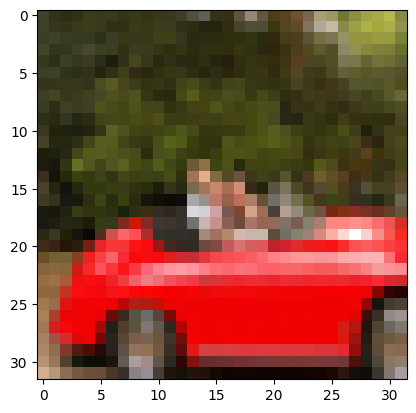

In [12]:
plt.imshow(img_t.permute(1, 2, 0))

In [13]:
import torch

A = torch.arange(0, 12).reshape(4, 3)

A.shape

torch.Size([4, 3])

In [14]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [15]:


imgs.shape

torch.Size([3, 32, 32, 50000])

In [16]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [17]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [18]:
transformed_cifar10 = datasets.CIFAR10("../", train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=(0.4915, 0.4823, 0.4468),
                                                                std=(0.2470, 0.2435, 0.2616))
                                       ]))
transformed_cifar10_val = datasets.CIFAR10("../", train=False, download=False,
                                           transform=transforms.Compose([
                                            transforms.ToTensor()                                               
                                           ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


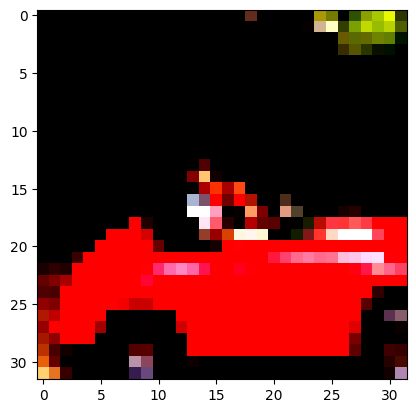

In [19]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

In [20]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in transformed_cifar10_val if label in [0, 2]]

In [69]:
cifar2

[(tensor([[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
           [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
           [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
           ...,
           [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
           [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
           [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],
  
          [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
           [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
           [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
           ...,
           [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
           [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
           [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],
  
          [[-0.4487, -0.7935, -0.1939,  ..., -0.6136, -0.6736, -0.8535],
           

In [21]:
import torch.nn as nn
from collections import OrderedDict

n_out = 2

model = nn.Sequential(
    OrderedDict([
        ("fc1", nn.Linear(in_features=3072, out_features=512)),
        ("tanh", nn.Tanh()),
        ("fc2", nn.Linear(512, n_out))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8628641..2.029448].


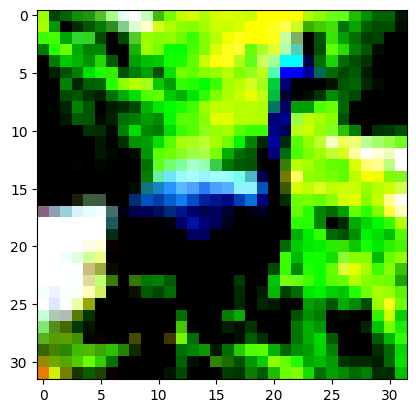

In [22]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [23]:
img.shape

torch.Size([3, 32, 32])

In [24]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [25]:
out = model(img_batch)
out

tensor([[-0.0182,  0.0948]], grad_fn=<AddmmBackward0>)

In [26]:
import torch
_, index = torch.max(out, dim=1)
index

tensor([1])

In [27]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
)
loss = nn.CrossEntropyLoss()

In [28]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.4803, grad_fn=<NllLossBackward0>)

In [29]:
nn.CrossEntropyLoss()

CrossEntropyLoss()

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim


model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in cifar2:
        optimizer.zero_grad()
        out = model(img.view(-1).unsqueeze(0))
        loss = criterion(out, torch.tensor([label]))

        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch}, Loss {float(loss)}")

Epoch: 0, Loss 7.276182174682617
Epoch: 1, Loss 3.0016369819641113
Epoch: 2, Loss 5.243943691253662
Epoch: 3, Loss 9.904048919677734
Epoch: 4, Loss 9.607035636901855


In [31]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

mps


In [32]:
from torch.utils.data import DataLoader


train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
).to(device)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1).to(device))
        loss = criterion(outputs, labels.to(device))

        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch}, Loss {float(loss)}")

Epoch: 0, Loss 0.5950651168823242
Epoch: 1, Loss 0.43809664249420166
Epoch: 2, Loss 0.4456266164779663
Epoch: 3, Loss 0.2923978269100189
Epoch: 4, Loss 0.43362265825271606
Epoch: 5, Loss 0.25760623812675476
Epoch: 6, Loss 0.6278595328330994
Epoch: 7, Loss 0.3982343077659607
Epoch: 8, Loss 0.5699536204338074
Epoch: 9, Loss 0.45248106122016907
Epoch: 10, Loss 0.27959170937538147
Epoch: 11, Loss 0.4169301390647888
Epoch: 12, Loss 0.4263761639595032
Epoch: 13, Loss 0.1113770604133606
Epoch: 14, Loss 0.3345697224140167
Epoch: 15, Loss 0.3766452372074127
Epoch: 16, Loss 0.23467189073562622
Epoch: 17, Loss 0.3687778115272522
Epoch: 18, Loss 0.6913491487503052
Epoch: 19, Loss 0.2935943007469177
Epoch: 20, Loss 0.33888792991638184
Epoch: 21, Loss 0.3193034529685974
Epoch: 22, Loss 0.3181975483894348
Epoch: 23, Loss 0.4453901946544647
Epoch: 24, Loss 0.23508693277835846
Epoch: 25, Loss 0.2046796679496765
Epoch: 26, Loss 0.2767428755760193
Epoch: 27, Loss 0.16741132736206055
Epoch: 28, Loss 0.148

In [33]:
val_loader = DataLoader(cifar2_val, batch_size=64, shuffle=False, num_workers=10)

correct = 0
total = 0

model.eval()
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()
print(f"Accuracy: {correct / total}")

Accuracy: 0.765


In [34]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [35]:
import torch.nn as nn
conv = nn.Conv2d(3, 16, kernel_size=4)
conv

Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))

In [36]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 4, 4]), torch.Size([16]))

In [37]:
help(nn.Conv2d)

Help on class Conv2d in module torch.nn.modules.conv:

class Conv2d(_ConvNd)
 |  Conv2d(in_channels: int, out_channels: int, kernel_size: Union[int, tuple[int, int]], stride: Union[int, tuple[int, int]] = 1, padding: Union[str, int, tuple[int, int]] = 0, dilation: Union[int, tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None) -> None
 |
 |  Applies a 2D convolution over an input signal composed of several input
 |  planes.
 |
 |  In the simplest case, the output value of the layer with input size
 |  :math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
 |  can be precisely described as:
 |
 |  .. math::
 |      \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
 |      \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)
 |
 |
 |  where :math:`\star` is the valid 2D `cross-correlation`_ operator,
 |  :math:`N` is a bat

In [38]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 29, 29]))

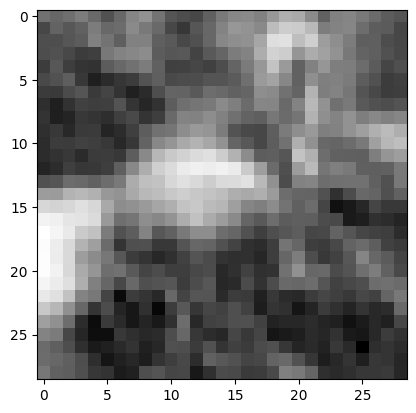

In [39]:
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.show()

In [40]:
output.shape

torch.Size([1, 16, 29, 29])

In [41]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [42]:
with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

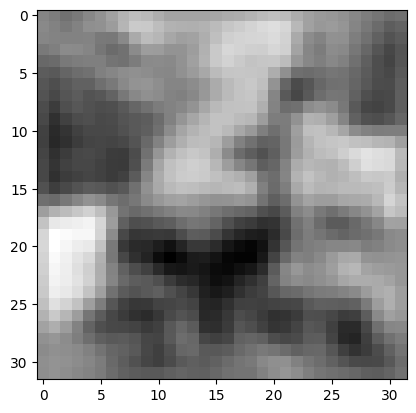

In [43]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.show()

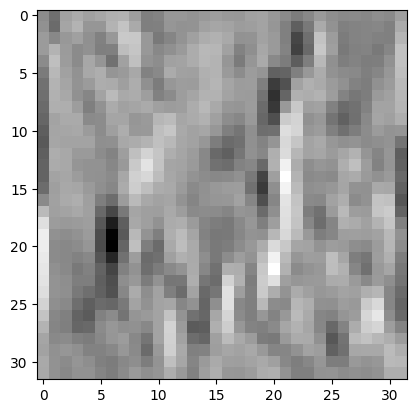

In [44]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap="gray")

In [45]:
pool = nn.MaxPool2d(kernel_size=2)
output = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [46]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # チャネルの数が3→16になる
    nn.Tanh(),
    nn.MaxPool2d(2),  # poolingによって、画像のサイズを32x32 → 16x16に変換する
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # チャネルの数が16→8になる
    nn.Tanh(),
    nn.MaxPool2d(2),  # poolingによって、画像サイズを16x16 → 8x8に変換する
    
    nn.Linear(8*8*8, 32),  # 画像のサイズが8x8, チャネル数が8のため, 8x8x8
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [47]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [48]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)

        self.tanh1 = nn.Tanh()
        self.tanh2 = nn.Tanh()
        self.tanh3 = nn.Tanh()

        self.pool1 = nn.MaxPool2d(2)
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(8*8*8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.tanh1(self.conv1(x)))
        out = self.pool2(self.tanh2(self.conv2(out)))
        out = out.view(-1, 8*8*8)  # viewで(1, 512)のサイズのテンソルに整形する
        out = self.tanh3(self.fc1(out))
        out = self.fc2(out)
        return out

In [49]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [50]:
model(img.unsqueeze(0))

tensor([[0.0934, 0.0265]], grad_fn=<AddmmBackward0>)

In [51]:
device

device(type='mps')

In [53]:
train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)
model = Net()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()

In [81]:
import time
num_epoch = 100

start = time.time()
epoch_time = start
model.to(device)
for epoch in range(num_epoch):
    loss_train = 0.0
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        loss_train += loss.item()

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"{time.time() - epoch_time} Epoch {epoch + 1}, Train loss {loss_train}")
        epoch_time = time.time()
print(f"All time: {time.time() - start}")


0.5219011306762695 Epoch 1, Train loss 0.5026734523708001
3.955008029937744 Epoch 10, Train loss 0.4853331978665665
4.417734146118164 Epoch 20, Train loss 0.4708402073010802
4.443947792053223 Epoch 30, Train loss 0.4559808468911797
4.321792125701904 Epoch 40, Train loss 0.4400796538684517
4.1893696784973145 Epoch 50, Train loss 0.4288436557399109
4.269876956939697 Epoch 60, Train loss 0.4205164601444267
4.195214033126831 Epoch 70, Train loss 0.406171917100437
4.268528938293457 Epoch 80, Train loss 0.3907321682199836
3.994342803955078 Epoch 90, Train loss 0.3831836502067745
4.171405076980591 Epoch 100, Train loss 0.37246085092192516
All time: 42.750240087509155


In [80]:
from torch.utils.data import Dataset, TensorDataset

train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = DataLoader(cifar2_val, batch_size=64, shuffle=False)

model.eval()

with torch.no_grad():
    total = 0
    correct = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)

        _, pred = torch.max(outputs, dim=1)

        total += labels.shape[0]
        correct += int((pred == labels).sum())
    print(f"Accuracy train: {correct / total}")

    total = 0
    correct = 0
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)

        _, pred = torch.max(outputs, dim=1)

        total += labels.shape[0]
        correct += int((pred == labels).sum())
    print(f"Accuracy val: {correct / total}")


Accuracy train: 1.0
Accuracy val: 0.7705
